In [122]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import numpy as np
from sklearn import datasets, linear_model, metrics

from google.colab import files
uploaded = files.upload()

Saving data-penumpang-kapal-dari-ke-kepri-januari-2018.csv to data-penumpang-kapal-dari-ke-kepri-januari-2018 (2).csv


In [123]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data-penumpang-kapal-dari-ke-kepri-januari-2018.csv']))
df

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,1/1/2018,P. MUARA ANGKE,12,32,1370,7783
1,1/2/2018,P. MUARA ANGKE,15,14,841,2303
2,1/3/2018,P. MUARA ANGKE,13,6,1013,981
3,1/4/2018,P. MUARA ANGKE,7,10,811,1092
4,1/5/2018,P. MUARA ANGKE,12,13,1017,763
5,1/1/2018,MARINA/ANCOL,12,1,561,15
6,1/2/2018,MARINA/ANCOL,4,6,362,409
7,1/3/2018,MARINA/ANCOL,3,4,282,2890
8,1/4/2018,MARINA/ANCOL,3,4,256,294
9,1/5/2018,MARINA/ANCOL,6,6,479,265


In [124]:
d = {'P. MUARA ANGKE':8,'MARINA/ANCOL':7,'UNTUNG/JAWA':6,'LANCANG':5,'PARI':4,'TIDUNG/PAYUNG':3,'PRAMUKA/PANGGANG':2,'KELAPA':1,'HARAPAN':0}
df['pelabuhan'] = df['pelabuhan'].map(d)

df

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,1/1/2018,8,12,32,1370,7783
1,1/2/2018,8,15,14,841,2303
2,1/3/2018,8,13,6,1013,981
3,1/4/2018,8,7,10,811,1092
4,1/5/2018,8,12,13,1017,763
5,1/1/2018,7,12,1,561,15
6,1/2/2018,7,4,6,362,409
7,1/3/2018,7,3,4,282,2890
8,1/4/2018,7,3,4,256,294
9,1/5/2018,7,6,6,479,265


In [126]:
features = ['kapal_berangkat','kapal_tiba']

X = df[features]
y = df["pelabuhan"]

print(X)
print(y)

    kapal_berangkat  kapal_tiba
0                12          32
1                15          14
2                13           6
3                 7          10
4                12          13
5                12           1
6                 4           6
7                 3           4
8                 3           4
9                 6           6
10                7          19
11                5           7
12                7           7
13                8           8
14                6           6
15                4           4
16                4           4
17                4           4
18                4           4
19                4           4
20                3          28
21               12          15
22                5           5
23                6           6
24                6           9
25                1          12
26                9           5
27                8           3
28                6           2
29                3           3
30      

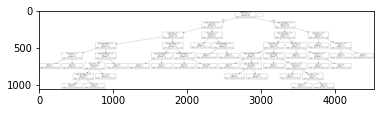

In [127]:
dtree = DecisionTreeClassifier()

dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('decisiontree.png')

img=pltimg.imread('decisiontree.png')
imgplot = plt.imshow(img)
plt.show()
